In [107]:
# Make needed imports
import pandas as pd
import numpy as np
import sns as sns
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt

In [108]:
# Load train and testing data
training_data = pd.read_pickle("../data/train.pkl")
testing_data = pd.read_pickle("../data/test.pkl")
training_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2,2013,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
7,2008,58.1,287,80,0.03,25.873925,64,1599,15.7,110,64,8.33,64,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
9,2006,57.3,295,84,0.03,17.171518,64,1990,14.7,116,58,7.43,58,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1
8,2007,57.5,295,82,0.02,10.910156,63,1141,15.2,113,63,6.73,63,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
10,2005,57.3,291,85,0.02,1.388648,66,1296,14.2,118,58,8.70,58,0.1,25.294130,257798.0,19.3,19.5,0.396,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2010,52.4,527,29,5.21,53.308581,9,9696,29.4,44,89,5.37,89,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
1,2013,58.0,399,25,6.39,10.666707,95,0,3.8,36,95,6.88,95,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
11,2003,44.5,715,26,4.06,0.000000,7,998,26.7,41,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
14,2000,46.0,665,24,1.68,0.000000,79,1483,25.5,39,78,7.10,78,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [109]:
testing_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
14,2001,55.3,316,88,0.01,10.574728,63,8762,12.6,122,35,7.80,33,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
12,2003,56.7,295,87,0.01,11.089053,65,798,13.4,122,41,8.82,41,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
13,2002,56.2,3,88,0.01,16.887351,64,2486,13.0,122,36,7.76,36,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
3,2012,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
14,2001,73.6,14,1,4.25,96.205571,96,18,46.0,1,97,6.00,97,0.1,1326.973390,36173.0,2.1,2.1,0.662,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2007,52.6,487,32,2.08,10.851482,8,535,19.2,51,77,4.37,8,13.6,114.587985,12725974.0,6.9,6.8,0.492,11.1
8,2006,58.0,526,33,2.25,1.860004,81,459,18.8,52,83,6.11,81,15.9,13.154199,12383446.0,7.0,6.9,0.479,10.9
13,2001,45.3,686,25,1.72,0.000000,76,529,25.9,39,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
12,2002,44.8,73,25,4.43,0.000000,73,304,26.3,40,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [110]:
# Seperate training X and Y values
train_X = training_data.iloc[:, 2:20].values
train_Y = training_data.iloc[:, 1].values
train_Y

array([59.9, 58.1, 57.3, ..., 44.5, 46. , 59.2])

In [111]:
train_X

array([[2.68e+02, 6.60e+01, 1.00e-02, ..., 1.77e+01, 4.70e-01, 9.90e+00],
       [2.87e+02, 8.00e+01, 3.00e-02, ..., 1.89e+01, 4.33e-01, 8.70e+00],
       [2.95e+02, 8.40e+01, 3.00e-02, ..., 1.93e+01, 4.05e-01, 8.10e+00],
       ...,
       [7.15e+02, 2.60e+01, 4.06e+00, ..., 9.90e+00, 4.18e-01, 9.50e+00],
       [6.65e+02, 2.40e+01, 1.68e+00, ..., 1.12e+01, 4.34e-01, 9.80e+00],
       [3.71e+02, 2.30e+01, 6.50e+00, ..., 5.70e+00, 4.98e-01, 1.03e+01]])

In [112]:
#Train Model
regressor = RandomForestRegressor(n_estimators = 300, max_leaf_nodes = 150, bootstrap = True)
# Fit the regressor with x and y data
regressor.fit(train_X, train_Y)
# Load testing values
test_X = testing_data.iloc[:, 2:20].values
test_Y = testing_data.iloc[:, 1].values
# Predict with testing X
predict_Y = regressor.predict(test_X)
print(predict_Y)

[56.83423171 57.36694278 66.66270244 59.25690451 73.01201334 72.79696915
 73.05848738 76.65518401 72.3333399  72.51397399 73.18680659 52.87358463
 53.25180471 74.90820539 76.7330973  75.59653627 72.85966909 72.75330312
 72.91553927 83.24900507 83.07256019 81.90381009 79.33722727 80.14117713
 79.45015386 71.32555826 71.50968509 71.10425134 66.4055773  67.81018472
 68.2400269  67.6904587  67.71051929 68.04031385 81.28892518 79.67322893
 82.67039075 69.42744924 69.0994637  69.49021825 56.64882874 56.53594601
 56.95883454 67.18763926 62.04810358 63.17988975 71.63026069 72.49916666
 73.40000491 48.19249063 48.48039836 52.13700906 72.3403869  72.77791536
 73.18778427 73.70427045 73.20928168 73.09592079 57.54086574 56.71635574
 55.31940663 55.2916856  54.72055685 71.76999336 71.40642633 71.54450486
 66.65891228 64.90016276 55.55542841 55.62807023 81.30318554 82.12040398
 82.74515491 51.11563348 51.90187159 51.81891359 54.61246892 79.17152952
 78.34999183 71.89515495 71.81232332 72.27549378 72

In [113]:
test_X

array([[3.16e+02, 8.80e+01, 1.00e-02, ..., 2.40e+00, 3.40e-01, 5.90e+00],
       [2.95e+02, 8.70e+01, 1.00e-02, ..., 1.99e+01, 3.73e-01, 6.50e+00],
       [3.00e+00, 8.80e+01, 1.00e-02, ..., 2.20e+00, 3.41e-01, 6.20e+00],
       ...,
       [6.86e+02, 2.50e+01, 1.72e+00, ..., 1.70e+00, 4.27e-01, 9.80e+00],
       [7.30e+01, 2.50e+01, 4.43e+00, ..., 1.30e+00, 4.27e-01, 1.00e+01],
       [7.23e+02, 2.70e+01, 4.36e+00, ..., 9.40e+00, 4.07e-01, 9.20e+00]])

In [114]:
test_Y

array([55.3, 56.7, 56.2, 59.5, 73.6, 72.8, 73.3, 76.9, 72.9, 73.4, 73.8,
       49.6, 49.1, 74.1, 74.7, 74.9, 72.6, 72.6, 73. , 79.9, 86. , 81. ,
       78.6, 78.7, 79.3, 67.8, 68.4, 68.4, 67.3, 67.8, 68.2, 67.7, 67.2,
       68.2, 78. , 78. , 78.8, 68.2, 68.5, 68.7, 55.8, 56.1, 56.5, 61.7,
       62.5, 64.2, 75. , 75.7, 75.4, 46.7, 46. , 48.1, 71. , 71.4, 72. ,
       71.6, 71.8, 72.2, 57.5, 56.1, 53.4, 54.1, 54.8, 71.1, 71.4, 71.8,
       66.6, 65.6, 53.6, 53.3, 80. , 81. , 85. , 49.2, 53. , 51.8, 57. ,
       79.1, 79.6, 72.2, 72.7, 73.5, 71.5, 71.8, 72.8, 59.8, 60. , 63. ,
       77.5, 78.3, 77.7, 76.6, 76.3, 78.2, 78.4, 78.6, 61.3, 69. , 71.2,
       71.4, 69.3, 73.4, 73.6, 74.4, 68.9, 73. , 70. , 59.1, 58.8, 72.8,
       73. , 73. , 61.8, 68. , 67.8, 67.9, 68.1, 79. , 79.2, 82. , 61.6,
       61.4, 73. , 71.7, 72.3, 78.3, 78.4, 79.1, 57.9, 58.3, 58.9, 78.7,
       79. , 79.2, 75. , 69.7, 57.8, 57.3, 56.7, 57.6, 65.3, 65.1, 65. ,
       62.7, 71.3, 71.6, 72.2, 64.4, 64.8, 65.2, 66

In [115]:
#basline estimate
# The baseline predictions are the historical averages
baseline_preds = testing_data.iloc[:, 8:9].values
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_Y)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  32.38


In [116]:
# Use the forest's predict method on the test data
predictions = regressor.predict(test_X)
# Calculate the absolute errors
errors = abs(predictions - test_Y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.38 degrees.


In [117]:
#Determine Performance Metrics
# Calculate mean absolute percentage error
feature = 100 * (errors / predict_Y)
# Calculate and display accuracy
accuracy = 100 - np.mean(feature)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.86 %.


In [118]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(testing_data, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable:                   16 Importance: 0.56
Variable:                   11 Importance: 0.25
Variable:                    0 Importance: 0.11
Variable:                    2 Importance: 0.01
Variable:                    6 Importance: 0.01
Variable:                    9 Importance: 0.01
Variable:                   14 Importance: 0.01
Variable:                   15 Importance: 0.01
Variable:                   17 Importance: 0.01
Variable:                    1 Importance: 0.0
Variable:                    3 Importance: 0.0
Variable:                    4 Importance: 0.0
Variable:                    5 Importance: 0.0
Variable:                    7 Importance: 0.0
Variable:                    8 Importance: 0.0
Variable:                   10 Importance: 0.0
Variable:                   12 Importance: 0.0
Variable:                   13 Importance: 0.0


In [119]:
train_important = training_data.iloc[:, 11:17].values
test_important = testing_data.iloc[:, 11:17].values
updated_testing = testing_data.iloc[:, 11:17]

In [120]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(updated_testing, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable:                   11 Importance: 0.11
Variable:                   13 Importance: 0.01
Variable:                   12 Importance: 0.0
Variable:                   14 Importance: 0.0
Variable:                   15 Importance: 0.0
Variable:                   16 Importance: 0.0


In [121]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators = 300, max_leaf_nodes = 150, bootstrap = True)
# Train the random forest
rf_most_important.fit(train_important, train_Y)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_Y)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_Y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.24 degrees.
Accuracy: 96.55 %.


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


ValueError: The number of FixedLocator locations (18), usually from a call to set_ticks, does not match the number of ticklabels (20).

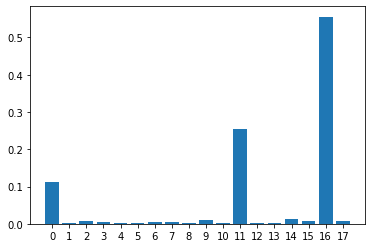

In [122]:
import matplotlib.pyplot as plt

x_value = list(range(len(importances)))
print(x_value)

plt.bar(x_value, importances, orientation = 'vertical')

plt.xticks(x_value, testing_data, rotation = 6)

plt.ylabel('importance');
plt.xlable('Variable');
plt.title('Variable Importance');
plt.show()

Loss percentage on testing set: 0.21265198620785974
MSE loss on testing set: 4.061887002513058
Random forest regressor score: 0.9516112329004982


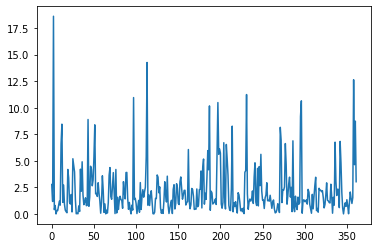

In [123]:
losses = []
# calculate the percentage
for i in range(len(test_Y)):
    dif = (abs(float(test_Y[i] - predict_Y[i])) / float(test_Y[i])) * 100
    losses.append(dif)
# print(losses)
plt.plot(losses)
#calculate total value of loss
totalValue = np.sum(losses) % 100
print("Loss percentage on testing set: " + str(totalValue / len(losses)))
errors = mean_squared_error(test_Y, predict_Y)
print("MSE loss on testing set: " + str(mean_squared_error(test_Y, predict_Y)))
print("Random forest regressor score: " + str(regressor.score(test_X, test_Y)))